In [3]:
import os 

trainingdata = os.listdir("train/")[:10000]
print(len(trainingdata))


10000


In [4]:
labels = [] 
for i in trainingdata: 
    if "cat" in i: 
        labels.append(0) 
    else:
        labels.append(1) 
print(labels)

[1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 

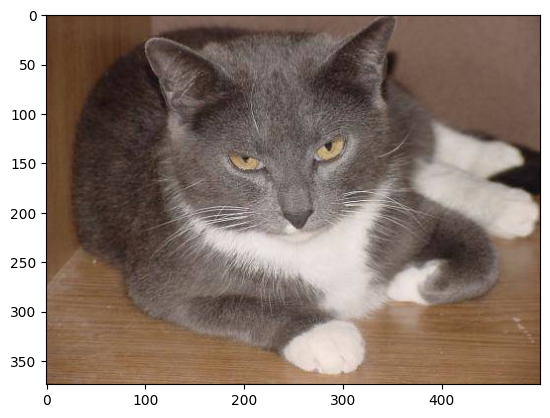

In [5]:
import matplotlib.pyplot as plt 
import matplotlib.image as img 

catimage = img.imread('train/cat.10045.jpg') 
plt.imshow(catimage)

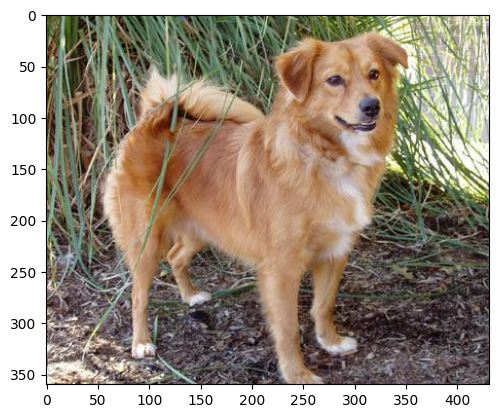

In [6]:
dogimage = img.imread('train/dog.10003.jpg')
plt.imshow(dogimage)

In [7]:
import PIL 
for file_name in trainingdata:
    img = PIL.Image.open('train/' + file_name) 
    img = img.resize((224,224)) 
    img = img.convert('RGB') 

    img.save('resized/' + file_name)

In [8]:
import cv2 
import numpy as np  

catdogpics = []

for file_name in trainingdata:  
    img = cv2.imread('resized/' + file_name) 

    catdogpics.append(img) 
catdogpics = np.asanyarray(catdogpics)


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 4 extraneous bytes before marker 0xd9
Corrupt JPEG data: 5 extraneous bytes before marker 0xd9
Corrupt JPEG data: 3 extraneous bytes before marker 0xd9
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: premature end of data segment
Corrupt JPEG 

In [9]:
from sklearn.model_selection import train_test_split  

labels = np.asarray(labels) 

x_train, x_test, y_train, y_test = train_test_split(catdogpics, labels, test_size=0.2, random_state=2) 

x_train_scaled = x_train / 255 
x_test_scaled = x_test / 255

In [10]:
import tensorflow as tf
import tensorflow_hub as hub


mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)


In [11]:
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(2)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [12]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [13]:
model.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
250/250 [==============================] - 34s 129ms/step - loss: 0.1046 - acc: 0.9582
Epoch 2/5
250/250 [==============================] - 32s 129ms/step - loss: 0.0532 - acc: 0.9799
Epoch 3/5
250/250 [==============================] - 33s 133ms/step - loss: 0.0427 - acc: 0.9850
Epoch 4/5
250/250 [==============================] - 33s 131ms/step - loss: 0.0379 - acc: 0.9862
Epoch 5/5
250/250 [==============================] - 33s 132ms/step - loss: 0.0319 - acc: 0.9889


In [14]:
 
score, acc = model.evaluate(x_test_scaled, y_test)
print('Score:', score)
print('Accuracy:',  acc)

63/63 [==============================] - 9s 132ms/step - loss: 0.0545 - acc: 0.9825
Score: 0.05453136935830116
Accuracy: 0.9825000166893005


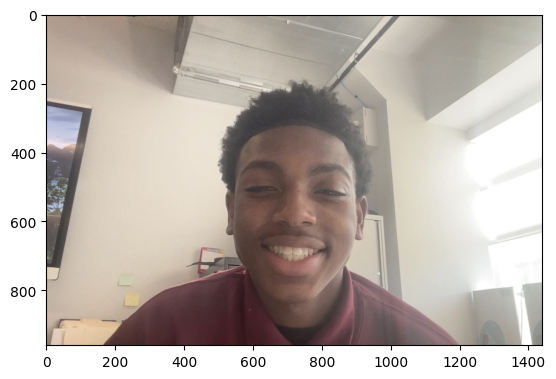

In [28]:
import matplotlib.image as img
image_number = 12501

test_image = img.imread(f"test1/{image_number}.jpg") 
plt.imshow(test_image)

In [30]:
input_image = cv2.imread(f"test1/{image_number}.jpg") 

input_image =cv2.resize(input_image, (224,224))

input_image = input_image/255 

input_image = np.reshape(input_image, [1,224,224,3])

prediction = model.predict(input_image)

print(prediction) 

cat_or_dog = np.argmax(prediction) 
print(cat_or_dog)

1/1 [==============================] - 0s 26ms/step
[[0.08984939 0.12485597]]
1
